In [1]:
import matplotlib as mpl
import os
import glob
import json
import pymworks
import re
import datautils
import copy
import math
import time

import multiprocessing as mp
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import cPickle as pkl
from cPickle import PicklingError

import scipy.stats as spstats
import utils as util
import process_datafiles as processd

import pprint

pp = pprint.PrettyPrinter(indent=4)

def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/pymworks/protocol/__init__.py:15: UserWarning: networkx is required for pymworks.protocols.states
  warnings.warn('networkx is required for pymworks.protocols.states')
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/datautils/__init__.py:22: UserWarning: datautils.mongo failed to import with: No module named pymongo
  warnings.warn('datautils.mongo failed to import with: %s' % E)
utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/e

# Set root and meta

In [2]:
rootdir = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

metadata = util.get_metadata(paradigm, rootdir=rootdir, create_meta=False)


Loading existing metadata...


# Load 1 animal

#### Find correct sessions

In [3]:
def check_against_manual_sorting(animalid, phase, paradigm='threeport', 
                                 rootdir='/n/coxfs01/behavior-data'):
    '''
    Based on JM's sorting, expects:
        PHASE:
            2_size
            3_deptrotr_l
            4_fullcross, etc.
            
        os.path.join(by_phase_cohort_dir, 'AL13 - AL16', <PHASE>, AL*_YYMMDD.mwk)
    
    '''
    
    cohort = re.search('(\D+)', animalid).group(0)
    sorted_cohort_dir = os.path.join(rootdir, paradigm, 'by_cohort', '%s_Cohort' % cohort, 'sorted', '_data')

    if cohort in ['AM', 'AN']:
        # 'PHASE_description'
        sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '%i_*' % phase, \
                                                    '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    elif cohort == 'AL':
#         sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '_current*', '%i_*' % phase, \
#                                                     '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
        sorted_dfns = sorted(glob.glob(os.path.join(rootdir, paradigm, 'by_phase', '%s*' % cohort, 
                                                          '%i_*' % phase, '%s*' % cohort, 
                                                          '%s_*.mwk' % animalid)), key=natural_keys)

    
    elif cohort == 'AK':
        sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '_regular*', '%i_*' % phase, \
                                                    '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    
    elif cohort == 'AJ':
        sorted_dfns = sorted(glob.glob(os.path.join(rootdir, paradigm, 'by_cohort', '%s_Cohort' % cohort, 'phase%i' % phase,
                                         '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    else:
        sorted_dfns = []
    
    print("[%s] %i datafiles for phase %i" % (animalid, len(sorted_dfns), phase))
    included_sessions = sorted(list(set([util.parse_datafile_name(dfn)[1] for dfn in sorted_dfns])), key=natural_keys)
    return [int(i) for i in included_sessions]



In [4]:
# for session in included_sessions:
#     print("--- %i" % int(session))
#     for fl in training_flag_names:
#         print(fl, df[df['session']==int(session)][fl].unique())

#### Check/test with 1 animal's datafile

In [5]:
# animalid = 'AL1'
# df, new_s = processd.get_animal_df(animalid, paradigm, metadata, create_new=False, rootdir=rootdir)
# df['object'] = [re.findall('(\d{1})', re.search('Blob(\D+\d{1})', imname).group(0).split('_')[1])[0]\
#                 if 'morph' not in imname else 'morph' 
#                 for imname in df['name']]

In [6]:
# phase = 3
# included_sessions = check_against_manual_sorting(animalid, phase)

# included_sessions

In [7]:


#### Get dataframe
training_flag_names = ['FlagAlwaysReward', #
                       'FlagStaircaseSize',
                       'FlagStaircaseDeptRotLeft', #
                       'FlagStaircaseDeptRotRight', 
                       'FlagShowOnlyTrainedAxes']
# ignore_keys = ['file_hash', 'filename', 'type']



In [8]:
# currdf = df[df['session'].isin(included_sessions)]

In [9]:
reload(processd)
reload(util)

process_datafiles.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/

<module 'utils' from 'utils.pyc'>

# Get all animasl in cohort

In [10]:
phase = 3
animal = 'AG7'
included_sessions = check_against_manual_sorting(animal, phase)
included_sessions

[AG7] 0 datafiles for phase 3


[]

In [11]:


dflist = []
for (cohort, animalid), g in metadata.groupby(['cohort', 'animalid']):
#     if animalid not in ['AG1', 'AG3', 'AG7', 'AG8', 'AG9', 'AG10', 'AG11']: #'AJ']:
#         continue
    if cohort != 'AG':
        continue
        
    a_df, new_s = processd.get_animal_df(animalid, paradigm, metadata, create_new=False, rootdir=rootdir)
    if a_df is None:
        continue

    #included_sessions = check_against_manual_sorting(animalid, phase)
    #currdf = a_df[a_df['session'].isin(included_sessions)].copy()
    
    a_df = a_df.reset_index(drop=True)
    
    for (session, suffix), g in a_df.groupby(['session', 'suffix']):
        tested_values = g['depth_rotation'].unique()
        if len(tested_values)==1:
            a_df['FlagStaircaseDeptRotRight'][g.index] =  pd.Series([0 for _ in np.arange(0, len(g))], index=g.index)
            a_df['FlagStaircaseDeptRotLeft'][g.index] =  pd.Series([0 for _ in np.arange(0, len(g))], index=g.index)
        else:
            if any(tested_values < 0):
                a_df['FlagStaircaseDeptRotLeft'][g.index] = pd.Series([1 for _ in np.arange(0, len(g))], index=g.index)
            if any(tested_values > 0):
                a_df['FlagStaircaseDeptRotRight'][g.index] = pd.Series([1 for _ in np.arange(0, len(g))], index=g.index)

    a_df['animalid'] = [animalid for _ in np.arange(0, len(a_df))]
    a_df['cohort'] = [cohort for _ in np.arange(0, len(a_df))]
    
    dflist.append(a_df)
df = pd.concat(dflist, axis=0).reset_index(drop=True)

... loading existing df


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/

... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [12]:
excl_sessions = sorted(df[df['object']=='morph']['session'].unique())

df = df[~df['session'].isin(excl_sessions)]

In [13]:
sorted(df[df['object']=='morph']['session'].unique())


[]

In [14]:
sorted(df['animalid'].unique())


['AG1',
 'AG10',
 'AG11',
 'AG12',
 'AG2',
 'AG3',
 'AG4',
 'AG5',
 'AG6',
 'AG7',
 'AG8',
 'AG9']

In [101]:
def get_phase_data(cohortdf, cohorts=[], phase=3):
    
    print("Phase: %i" % phase)

    if len(cohorts)==0:
        cohorts = cohortdf['cohort'].unique() #re.findall('(\D+)', animal)[0]
    
    included_df = cohortdf[cohortdf['cohort'].isin(cohorts)]
    dflist = []  
    for cohort, df in included_df.groupby(['cohort']):
        
        if phase == 1:
            currdf = df[((df['FlagStaircaseDeptRotRight'].isin([0, -1])) & (df['FlagStaircaseDeptRotLeft'].isin([0, -1])))
                        & (df['FlagStaircaseSize'].isin([0, -1]))]
#                         & (df['FlagShowOnlyTrainedAxes']==1)
#                         & (df['FlagAlwaysReward']==0)]
            
        elif phase == 2:
            currdf = df[((df['FlagStaircaseDeptRotRight'].isin([0, -1])) & (df['FlagStaircaseDeptRotLeft'].isin([0, -1])))
                        & (df['FlagStaircaseSize']==1)
                        & (df['FlagShowOnlyTrainedAxes']==1)]
#                         & (df['FlagAlwaysReward']==0)]

        elif phase == 3:
            if cohort in ['AG']:
                currdf = df[((df['FlagStaircaseDeptRotRight']==1) | (df['FlagStaircaseDeptRotLeft']==1)) 
                            & (df['FlagStaircaseSize'].isin([0, -1]))
                            & (df['FlagShowOnlyTrainedAxes']==1)]
#                             & (df['FlagAlwaysReward']==0)]
            else:
                currdf = df[(((df['FlagStaircaseDeptRotRight']==0) & (df['FlagStaircaseDeptRotLeft']==1)) 
                            | ((df['FlagStaircaseDeptRotRight']==1) & (df['FlagStaircaseDeptRotLeft']==0)))
                            & (df['FlagStaircaseSize'].isin([0, -1]))
                            & (df['FlagShowOnlyTrainedAxes']==1)]
#                             & (df['FlagAlwaysReward']==0)]

        elif phase == 4:
            currdf = df[((df['FlagStaircaseDeptRotRight'].isin([1, -1])) | 
                         (df['FlagStaircaseDeptRotLeft'].isin([1, -1])))
                        & (df['FlagStaircaseSize'].isin([1, -1]))
                        & (df['FlagShowOnlyTrainedAxes']==1)]
#                         & (df['FlagAlwaysReward']==0)]
            
        elif phase == 5:
            currdf = df[((df['FlagStaircaseDeptRotRight'].isin([1, -1])) | 
                         (df['FlagStaircaseDeptRotLeft'].isin([1, -1])))
                        & (df['FlagStaircaseSize'].isin([1, -1]))
                        & (df['FlagShowOnlyTrainedAxes']==0)]
#                         & (df['FlagAlwaysReward']==0)]
            
        dflist.append(currdf)
    df = pd.concat(dflist, axis=0).reset_index(drop=True)
    return df

In [79]:
# found_sessions = sorted(currdf[currdf['animalid']==animal]['session'].unique())
# for s in found_sessions:
#     print(s, df[df['session']==s]['depth_rotation'].unique(), df[df['session']==s]['depth_rotation'].unique())
    

In [102]:
phase = 3
currdf = get_phase_data(df, cohorts=[cohort], phase=phase)


Phase: 3


In [103]:
# AG4:
# Phase 3: 20150428 - 20150604
# Phase 4:  20150608 - 20151117

array([1], dtype=object)

In [123]:
animalid = 'AG4'
session = 20150330 #20150604
session_meta = metadata[(metadata['animalid']==animalid) & (metadata['session']==session)]
S = util.Session(session_meta)
_, _, metainfo = S.get_trials()

--> [1] of 1: /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG4_150330.mwk
---


In [124]:
sizes = sorted(np.unique([t['size'] for t in S.trials]))
drots = sorted(np.unique([t['depth_rotation'] for t in S.trials]))
print(len(sizes), len(drots))

(16, 1)


In [200]:
reload(util)

utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-package

<module 'utils' from 'utils.py'>

In [201]:
animalid = 'AG7'

In [202]:
phase_lookup = {0: 'manual',
                1: 'default',
                2: 'size',
                3: 'depth_rotation',
                4: 'cross',
                5: 'size_and_depth_rotation',
                6: 'depth_and_planar_rotation',
                7: 'morph'
                -1: 'other'}

default_size = 30
default_depth_rotation = 0.
default_planar_rotation = 0.

In [222]:
mgroup

,animalid,cohort,datasource,session,suffix
4714,AG1,AG,/n/coxfs01/behavior-data/threeport/cohort_data...,20160920,a


In [233]:
(animalid, cohort, dsource, session, sfx), = mgroup.values
print(animalid, cohort, session, sfx)

('AG1', 'AG', 20160920, 'a')


In [230]:
mgroup.values

array([['AG1', 'AG',
        '/n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG1_160920a.mwk',
        20160920, 'a']], dtype=object)

In [ ]:

phasedata = []
animal_meta = metadata[metadata['cohort']== 'AG']

for (animalid, dfn), mgroup in animal_meta.groupby(['animalid', 'datasource']):
    
    phase = None
    (animalid, cohort, dsource, session, sfx), = mgroup.values

    curr_trials, curr_flags, metainfo = util.parse_mw_file(dfn, create_new=False)
    
    if curr_trials is None or len(curr_trials)==0:
        continue
    
    #curr_trials = [t for t in S.trials if t['suffix']==suffix]
    
    sizes = sorted(np.unique([t['size'] for t in curr_trials]))
    drots = sorted(np.unique([t['depth_rotation'] for t in curr_trials]))
    prots = sorted(np.unique([t['rotation'] for t in curr_trials]))
    
    if metainfo['protocol'] == 'Test all transformations':
        if len(sizes) > 1 and len(drots) > 1 and len(prots)==1:
            off_cross_transforms = list(set([(t['size'], t['depth_rotation']) for t in curr_trials \
                                             if t['size']!=default_size \
                                             and t['depth_rotation']!=default_depth_rotation]))
            if len(off_cross_transforms) == 0:
                phase = 4
            else:
                phase = 5
                
        elif len(prots) > 1:
            phase = 6
            
    elif metainfo['protocol'] == 'Staircase through shape parameters':
        phase = 3
        assert len(sizes)==1 or len(drots)==1, "...[%s, %s%s] more than 1 axis changing..." % (animalid, session, suffix)
        if len(sizes)>1:
            phase = 2 
        
    elif metainfo['protocol'] in ['Initiate VIsual Pres Protocol', 'Initiate Visual Pres Protocol']:
        if 'newstimuli' in metainfo['experiment']:
            phase = -1
            continue
            
        phase = 1
        assert len(sizes)==1 and len(drots)==1,  "...[%s, %s%s] DEFAULT view, but more than 1 axis changing..." % (animalid, session, suffix)
    
    elif metainfo['protocol'] == '':
        phase = 0
        
    elif 'morph' in metainfo['protocol']:
        phase = 7
        
    else:
        print("[%s, %s%s] UNKNOWN: %s" % (animalid, session, suffix, str(metainfo['protocol'])))
        phase = -1
        
    mgroup['phase'] = [phase for _ in np.arange(0, len(mgroup))]
    
    phasedata.append(mgroup)
    
phasedata = pd.concat(phasedata, axis=0)


***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG1_150202.pkl
-- finding stop
N total response events:  0
N total outcome events:  0
Found and removed 0 orphan stimulus events in file /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG1_150202.mwk
N valid trials: 0


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG1_151117.pkl
***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG1_151118.pkl
-- finding stop
[AG1, 20160127] UNKNOWN: Test all transformations with new lighting
[AG1, 20160128] UNKNOWN: Test all transformations with new lighting
[AG1, 20160202] UNKNOWN: Test all transformations with new lighting
[AG1, 20160203] UNKNOWN: Test all transformations with new lighting
[AG1, 20160204] UNKNOWN: Test all transformations with new lighting
[AG1, 20160205] UNKNOWN: Test all transformations with new lighting
[AG1, 20160208] UNKNOWN: Test all transformations with new lighting
[AG1, 20160209] UNKNOWN: Test all transformations with new lighting
[AG1, 20160210] UNKNOWN: Test all transformations with new lighting
[AG1, 20160211] UNKNOWN: Test all transformations with new lighting
[AG1, 20160212] UNKNOWN: Tes

In [235]:
animalid = 'AG1' # 'AG7' 
session = 20160920 #20151201 #20160311 #20150314
session_meta = metadata[(metadata['animalid']==animalid) & (metadata['session']==session)]
S = util.Session(session_meta)
_, _, metainfo = S.get_trials()
metainfo

--> [1] of 2: /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG1_160920a.mwk
--> [2] of 2: /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG1_160920b.mwk


{'address': ['192.168.0.20', '192.168.0.20'],
 'experiment': ['_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs_newstimuli',
  '_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs_newstimuli'],
 'experiment_path': ['/var/folders/bq/d_40rj9j1slfyy_dz1h7_7p80000gn/T/MWorks/Experiment Cache/_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs_newstimuli',
  '/var/folders/bq/d_40rj9j1slfyy_dz1h7_7p80000gn/T/MWorks/Experiment Cache/_Users_labuser_Downloads_RatBehaviorGeneral_Behavior_3Dtransforms_2way_blobs_newstimuli'],
 'protocol': ['Initiate Visual Pres Protocol', 'Test all transformations'],
 'screen': [{'distance': 12.5,
   'height': 11.75,
   'refresh_rate_hz': 60.0,
   'units': 'inches',
   'width': 14.75},
  {'distance': 12.5,
   'height': 11.75,
   'refresh_rate_hz': 60.0,
   'units': 'inches',
   'width': 14.75}],
 'server': ['Setup 10', 'Setup 10']}

In [209]:
# 'Test all transformations wih depth rotation in x axis',
# 'Test all transformations wih depth rotation in x axis - upside down!

phasedata = []
animal_meta = metadata[metadata['animalid']== animalid]

for (animalid, session, suffix), mgroup in animal_meta.sort_values(by='session').groupby(['animalid', 'session', 'suffix']):
    phase = None
    #session_meta = metadata[(metadata['animalid']==animalid) & (metadata['session']==session)]
    S = util.Session(mgroup)
    _, _, metainfo = S.get_trials(verbose=False)
    
    if S.trials is None:
        continue
    
    curr_trials = [t for t in S.trials if t['suffix']==suffix]
    
    sizes = sorted(np.unique([t['size'] for t in curr_trials]))
    drots = sorted(np.unique([t['depth_rotation'] for t in curr_trials]))
    prots = sorted(np.unique([t['rotation'] for t in curr_trials]))
    
    if metainfo['protocol'] == 'Test all transformations':
        if len(sizes) > 1 and len(drots) > 1 and len(prots)==1:
            off_cross_transforms = list(set([(t['size'], t['depth_rotation']) for t in curr_trials \
                                             if t['size']!=default_size \
                                             and t['depth_rotation']!=default_depth_rotation]))
            if len(off_cross_transforms) == 0:
                phase = 4
            else:
                phase = 5
                
        elif len(prots) > 1:
            phase = 6
            
    elif metainfo['protocol'] == 'Staircase through shape parameters':
        phase = 3
        assert len(sizes)==1 or len(drots)==1, "...[%s, %s%s] more than 1 axis changing..." % (animalid, session, suffix)
        if len(sizes)>1:
            phase = 2 
        
    elif metainfo['protocol'] in ['Initiate VIsual Pres Protocol', 'Initiate Visual Pres Protocol']:
        phase = 1
        assert len(sizes)==1 and len(drots)==1,  "...[%s, %s%s] DEFAULT view, but more than 1 axis changing..." % (animalid, session, suffix)
    
    elif metainfo['protocol'] == '':
        phase = 0
        
    elif 'morph' in metainfo['protocol']:
        phase = 7
        
    else:
        print("[%s, %s%s] UNKNOWN: %s" % (animalid, session, suffix, str(metainfo['protocol'])))
        phase = -1
        
    mgroup['phase'] = [phase for _ in np.arange(0, len(mgroup))]
    
    phasedata.append(mgroup)
    
phasedata = pd.concat(phasedata, axis=0)


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG8_151117.pkl
***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG8_151118.pkl
-- finding stop
N total response events:  0
N total outcome events:  0
Found and removed 0 orphan stimulus events in file /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG8_151118.mwk
N valid trials: 0
[AG8, 20160127] UNKNOWN: Test all transformations with new lighting
[AG8, 20160128] UNKNOWN: Test all transformations with new lighting
[AG8, 20160202] UNKNOWN: Test all transformations with new lighting
[AG8, 20160203] UNKNOWN: Test all transformations with new lighting
[AG8, 20160204] UNKNOWN: Test all transformations with new lighting
[AG8, 20160205] UNKNOWN: Test all transformations with new lighting
[AG8, 20160208] UNKNOWN: Test all transformations with new lighting
[AG8, 20160209] UNKNOWN: Test all trans

In [210]:
phasedata.groupby(['phase']).count()

,animalid,cohort,datasource,session,suffix
phase,,,,,
-1,21,21,21,21,21
0,2,2,2,2,2
1,24,24,24,24,24
2,14,14,14,14,14
3,13,13,13,13,13
4,41,41,41,41,41
5,51,51,51,51,51
6,9,9,9,9,9
7,10,10,10,10,10


In [194]:
session, suffix, sizes

(20160213, 'b', [25.0])

In [188]:
S.source

['/n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG2_160212.mwk',
 '/n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG2_160212b.mwk']

In [186]:

sizes = sorted(np.unique([t['size'] for t in S.trials]))
drots = sorted(np.unique([t['depth_rotation'] for t in S.trials]))
prots = sorted(np.unique([t['rotation'] for t in S.trials]))

print(sizes)
print(drots)
print(prots)

[15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[-60, -45, -30, -15, 0, 15, 30, 45, 60]
[0.0]


In [187]:
default_size = 30
default_depth_rotation = 0.
list(set([(t['size'], t['depth_rotation']) for t in S.trials \
          if t['size']!=default_size and t['depth_rotation']!=default_depth_rotation]))


[(40.0, 45),
 (25.0, -15),
 (15.0, -30),
 (35.0, 45),
 (25.0, -30),
 (20.0, 60),
 (20.0, -45),
 (40.0, 60),
 (40.0, -15),
 (35.0, -15),
 (40.0, -30),
 (35.0, 15),
 (25.0, 30),
 (15.0, 30),
 (20.0, 30),
 (35.0, -45),
 (25.0, 15),
 (15.0, 15),
 (25.0, 60),
 (35.0, -30),
 (20.0, -30),
 (15.0, 60),
 (25.0, 45),
 (35.0, 60),
 (15.0, -45),
 (35.0, -60),
 (40.0, 15),
 (40.0, -60),
 (20.0, 45),
 (15.0, 45),
 (25.0, -60),
 (25.0, -45),
 (35.0, 30),
 (40.0, 30),
 (40.0, -45),
 (15.0, -60),
 (20.0, 15),
 (20.0, -60),
 (20.0, -15),
 (15.0, -15)]

# Set output dir

In [84]:
outdir = os.path.join(rootdir, paradigm, 'processed', 'reaction-time')
if not os.path.exists(outdir):
    print("making dir")
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/behavior-data/threeport/processed/reaction-time


#### Group by features

In [85]:
# odf=currdf.copy() #currdf[(currdf['object']=='1')].copy()

#features = ['depth_rotation', 'size', 'rotation', 'object', 'response_time', 'outcome', 'session']
#odf = odf[features]

In [86]:
sorted(currdf['depth_rotation'].unique())

[-60, -45, -30, -15, 0, 15, 30, 45, 60]

In [87]:
planar_rots = sorted(currdf['rotation'].unique())
depth_rots = sorted(currdf['depth_rotation'].unique())
print("N in-plane: %i" % len(planar_rots))
print("N in-depth: %i" % len(depth_rots))


N in-plane: 24
N in-depth: 9


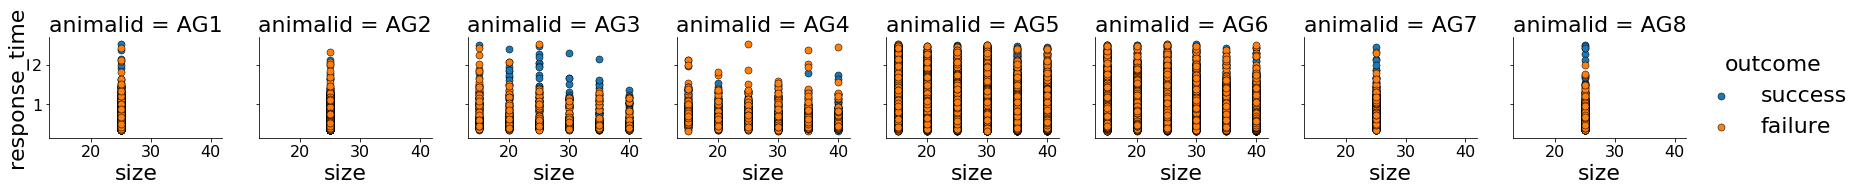

In [88]:
# For size
kws = dict(s=50, linewidth=.5, edgecolor="k")
g = sns.FacetGrid(currdf, col='animalid', hue='outcome')
g = (g.map(pl.scatter, 'size', "response_time", **kws)
     .add_legend())


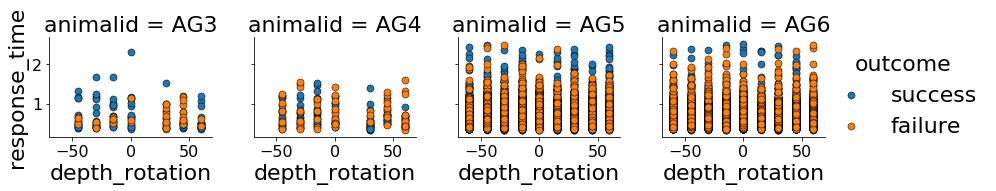

In [89]:
# For rotation
tmpdf = currdf[(currdf['size']==30) & (currdf['rotation']==0.)]
        
kws = dict(s=50, linewidth=.5, edgecolor="k")
g = sns.FacetGrid(tmpdf, col='animalid', hue='outcome')
g = (g.map(pl.scatter, 'depth_rotation', "response_time", **kws)
     .add_legend())


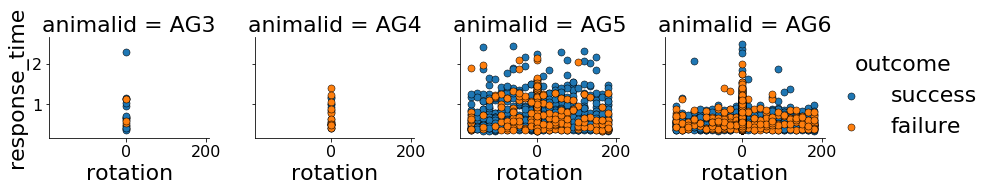

In [90]:
# For rotation
tmpdf = currdf[(currdf['size']==30) & (currdf['depth_rotation']==0.)]

kws = dict(s=50, linewidth=.5, edgecolor="k")
g = sns.FacetGrid(tmpdf, col='animalid', hue='outcome')
g = (g.map(pl.scatter, 'rotation', "response_time", **kws)
     .add_legend())


In [91]:
currdf['object'].unique()

array(['2', '1'], dtype=object)

#### visualize better

In [92]:
currdf['abs_depth_rotation'] = np.abs(currdf['depth_rotation'])
currdf['abs_planar_rotation'] = np.abs(currdf['rotation'])

In [93]:
# font = {'family' : 'Sans',
#         'weight' : 'normal',
#         'size'   : 22}	
# mpl.rc('font', **font)

#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = ['Arial']

mpl.rcParams['font.size'] = 22
mpl.rcParams['xtick.labelsize'] = 16 #('xtick', labelsize=16)     
mpl.rcParams['ytick.labelsize'] = 16 #('xtick', labelsize=16)     


response_time-by-depth_rotation_hold_size-30_rotation-0_split-object_success_AG_phase5


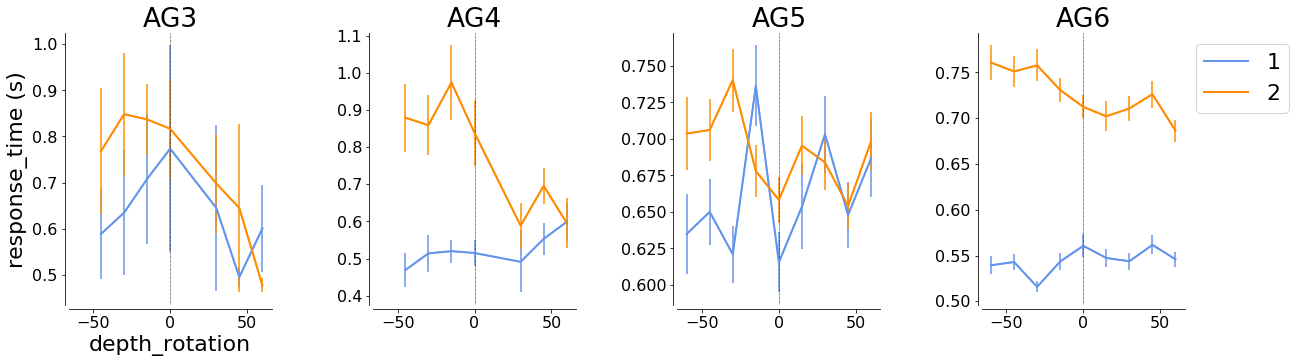

In [96]:
curr_feature = 'depth_rotation'

filter_outcome = 'success'

metric = 'response_time'
metric_units = 's'
object_colors = {'1': 'cornflowerblue', '2': 'darkorange'}
outcome_styles = {'success': '-', 'failure': ':', 'ignore': ':'}

if curr_feature == 'depth_rotation':
    trained_value = 0
    filter_feature = 'size'
    filter_value = 30
    filter_feature2 = 'rotation'
    filter_value2 = 0
    
elif curr_feature == 'size':
    trained_value = 30
    filter_feature= 'depth_rotation'
    filter_value = 0
    filter_feature2 = 'rotation'
    filter_value2 = 0
    
elif curr_feature == 'rotation':
    trained_value = 0
    filter_feature= 'size'
    filter_value = 30
    filter_feature2 = 'depth_rotation'
    filter_value2 = 0

if filter_feature2 is not None:
    thisdf = currdf[ (currdf[filter_feature]==filter_value)
                       & (currdf['outcome']==filter_outcome)
                       & (currdf[filter_feature2]==filter_value2)]
    feature_str = '%s-by-%s_hold_%s-%i_%s-%i' % (metric, curr_feature, filter_feature, filter_value, filter_feature2, filter_value2)
    
else:
    thisdf = currdf[ (currdf[filter_feature]==filter_value)
                       & (currdf['outcome']==filter_outcome) ]
    feature_str = '%s-by-%s_hold_%s-%i' % (metric, curr_feature, filter_feature, filter_value)

n_animals = len(thisdf['animalid'].unique())
n_sizes = len(thisdf['size'].unique())
n_cohorts = len(thisdf['cohort'].unique())
n_animals_per = np.max([len(g['animalid'].unique()) for cohort, g in thisdf.groupby(['cohort'])])
cohort_list = sorted(np.unique([cohort for cohort, g in thisdf.groupby(['cohort'])]))

fig, axes = pl.subplots(n_cohorts, n_animals_per, figsize=(n_animals_per*5, 5), sharex=True, sharey=False)

last_ci=0
ai=-1
for animalid, a_df in thisdf.groupby(['animalid']):
    ci = cohort_list.index(a_df['cohort'].unique()[0])
    if ci == last_ci:
        ai+=1
    else:
        ai=0
    if len(cohort_list)==1:
        if n_animals > 1:
            ax = axes[ai]
        else:
            ax = axes
    else:
        ax = axes[ci, ai]
    for obj, obj_df in a_df.groupby(['object']):
                
        feature_values = [r for r, g in obj_df.groupby([curr_feature])]
        yv = [g[metric].values for r, g in obj_df.groupby([curr_feature])]

        mean_ys = [np.mean(y) for y in yv]
        sem_ys = [spstats.sem(y) for y in yv]

        line_color = object_colors[obj]
        line_style = outcome_styles[filter_outcome]

        ax.plot(feature_values, mean_ys, color=line_color, lw=2, label=obj, ls=line_style)
        ax.errorbar(feature_values, mean_ys, yerr=sem_ys, ls=line_style, 
                    color=line_color)

        #xvp = np.concatenate(feature_values).ravel()
        #yvp = np.concatenate(yv).ravel()
        #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)
        ax.axvline(x=trained_value, linestyle=':', lw=0.5, color='k')

        if ai==0:
            #ax.set_ylabel(metric)
            ax.set_xlabel(curr_feature)
            ax.set_ylabel('%s (%s)' % (metric, metric_units))
    ax.set_title(animalid)
    last_ci = ci
    #     sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=odf, ax=ax, 
    #                 palette='colorblind', alpha=0.7)
ax.legend(bbox_to_anchor=(1, 1))

pl.subplots_adjust(wspace=0.5, hspace=0.5)
sns.despine(offset=4) #, trim=True)


figname = '%s_split-%s_%s_%s_phase%i' % (feature_str, 'object', filter_outcome, cohort, phase)
print(figname)


pl.savefig(os.path.join(outdir, '%s.svg' % figname))


response_time_by-rotation_per-depth_rotation_hold_size-30_split-object_success_AG_phase5


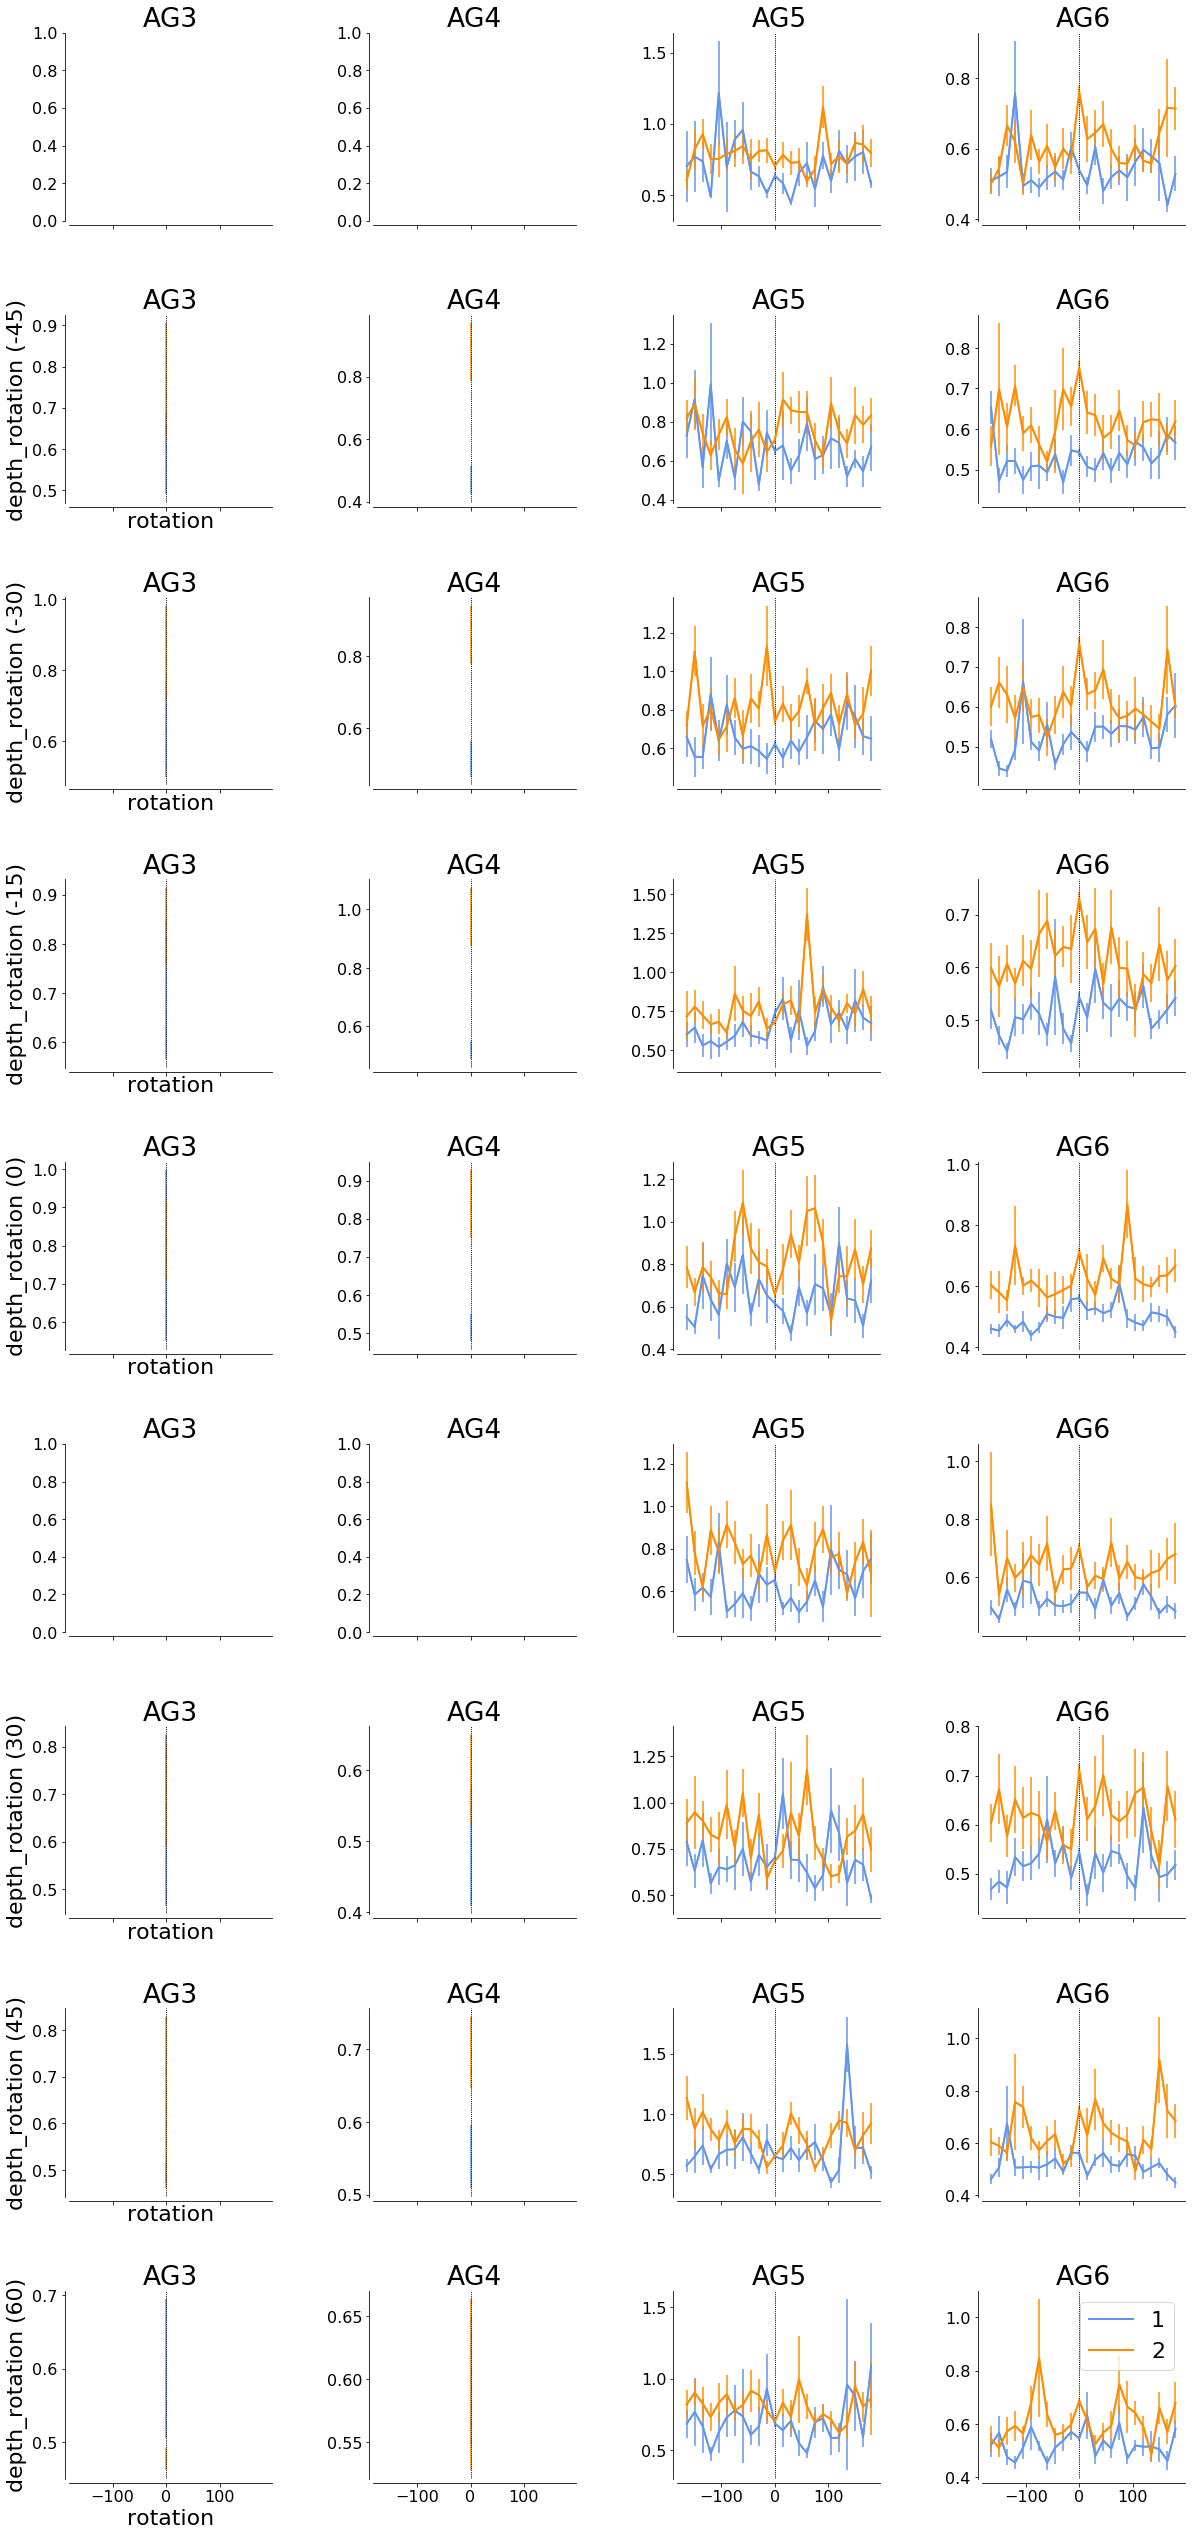

In [100]:
curr_feature1 = 'rotation'
trained_value1 = 0
curr_feature2 = 'depth_rotation'
trained_value2 = 0

filter_outcome = 'success'
feature_dict = {curr_feature1: trained_value1,
                curr_feature2:  trained_value2}

metric = 'response_time'
object_colors = {'1': 'cornflowerblue', '2': 'darkorange'}
outcome_styles = {'success': '-', 'failure': ':', 'ignore': ':'}

filter_feature = 'size'
filter_value = 30


feature_str = '%s_by-%s_per-%s_hold_%s-%i' % (metric, curr_feature1, curr_feature2, filter_feature, filter_value)



thisdf = currdf[ (currdf[filter_feature]==filter_value)
                   & (currdf['outcome']==filter_outcome) ]


n_animals = len(thisdf['animalid'].unique())
n_feature2 = len(thisdf[curr_feature2].unique())
feature2_values = sorted(thisdf[curr_feature2].unique())

#n_cohorts = len(thisdf['cohort'].unique())
n_animals_per = np.max([len(g['animalid'].unique()) for cohort, g in thisdf.groupby(['cohort'])])
cohort_list = sorted(np.unique([cohort for cohort, g in thisdf.groupby(['cohort'])]))

fig, axes = pl.subplots(n_feature2, n_animals_per, figsize=(n_animals_per*5, n_feature2*5), 
                        sharex=True, sharey=False)

last_ci=0
ai=-1
for ai, (animalid, a_df) in enumerate(thisdf.groupby(['animalid'])):
    for ci, feature2_val in enumerate(feature2_values):

        if n_feature2==1:
            ax = axes[ai]
        else:
            ax = axes[ci, ai]
        
        for obj, obj_df in a_df[a_df[curr_feature2]==feature2_val].groupby(['object']):

            feature1_values = [r for r, g in obj_df.groupby([curr_feature1])]
            yv = [g[metric].values for r, g in obj_df.groupby([curr_feature1])]

            mean_ys = [np.mean(y) for y in yv]
            sem_ys = [spstats.sem(y) for y in yv]

            line_color = object_colors[obj]
            line_style = outcome_styles[filter_outcome]

            ax.plot(feature1_values, mean_ys, color=line_color, lw=2, label=obj, ls=line_style)
            ax.errorbar(feature1_values, mean_ys, yerr=sem_ys, ls=line_style, 
                        color=line_color)
            
            trained_value = feature_dict[curr_feature1]
            ax.axvline(x=trained_value, linestyle=':', lw=0.8, color='k')

            if ai==0:
                #ax.set_ylabel(metric)
                ax.set_xlabel(curr_feature1)
                ax.set_ylabel('%s (%i)' % (curr_feature2, feature2_val))
        ax.set_title(animalid)
        last_ci = ci
        #     sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=odf, ax=ax, 
        #                 palette='colorblind', alpha=0.7)
ax.legend(bbox_to_anchor=(1,1))

pl.subplots_adjust(wspace=0.5, hspace=0.5)
sns.despine(offset=4) #, trim=True)



figname = '%s_split-%s_%s_%s_phase%i' % (feature_str, 'object', filter_outcome, cohort, phase)
print(figname)


pl.savefig(os.path.join(outdir, '%s.svg' % figname))


<Figure size 432x288 with 0 Axes>

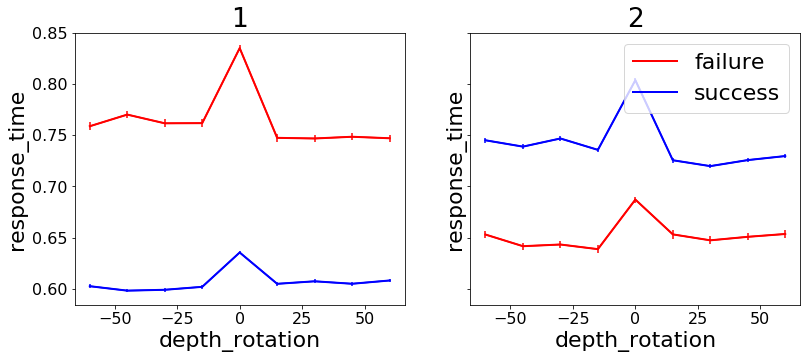

In [27]:
colors = {'success': 'b',
          'failure': 'r'}


pl.suptitle('Mean')

curr_feature = 'depth_rotation'
metric = 'response_time'

fig, axes = pl.subplots(1, 2, figsize=(13,5), sharex=True, sharey=True)
i=0
for obj, tmpd in currdf.groupby(['object']):
    ax = axes[i]
    for outcome, tmpd_by_outcome in tmpd.groupby(['outcome']):

        yv = [g[metric].values for r, g in tmpd_by_outcome.groupby([curr_feature])]
        xv = [np.array([r for _ in np.arange(len(g))]) for r, g in tmpd_by_outcome.groupby([curr_feature])]

        mean_xs = [np.mean(x) for x in xv]
        mean_ys = [np.mean(y) for y in yv]
        sem_ys = [spstats.sem(y) for y in yv]
        
        ax.plot(mean_xs, mean_ys, color=colors[outcome], lw=2, label=outcome)
        ax.errorbar(mean_xs, mean_ys, yerr=sem_ys, color=colors[outcome])

        xvp = np.concatenate(xv).ravel()
        yvp = np.concatenate(yv).ravel()
        #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)
        
        ax.set_title(obj)
        ax.set_ylabel(metric)
        ax.set_xlabel(curr_feature)

    i += 1
    
#     sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=odf, ax=ax, 
#                 palette='colorblind', alpha=0.7)
ax.legend()

Text(0.5,0.98,'Variance')

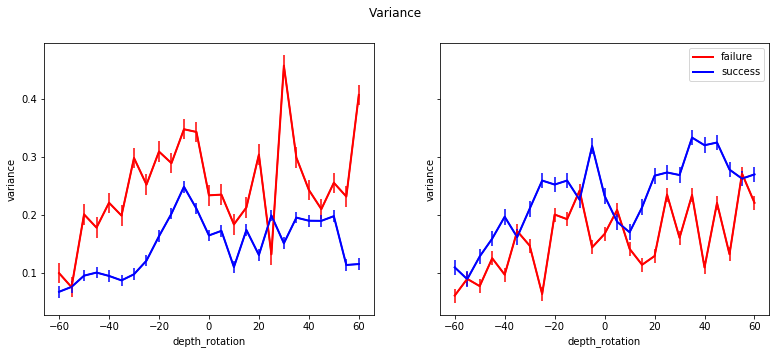

In [105]:
colors = {'success': 'b',
          'failure': 'r'}

curr_feature = 'depth_rotation'
metric = 'variance'

fig, axes = pl.subplots(1, 2, figsize=(13,5), sharex=True, sharey=True)
i=0
for obj, tmpd in currdf.groupby(['object']):
    ax = axes[i]
    for outcome, tmpd_by_outcome in tmpd.groupby(['outcome']):
        
        yv = [g['response_time'].values for r, g in tmpd_by_outcome.groupby([curr_feature])]
        xv = [np.array([r for _ in np.arange(len(g))]) for r, g in tmpd_by_outcome.groupby([curr_feature])]

        feature_values = [np.mean(x) for x in xv]
        response_values = [np.mean(y) for y in yv]
        
        response_values_var = [np.std(y)**2 for y in yv]
        response_sem = spstats.sem(response_values_var)
        ax.plot(feature_values, response_values_var, color=colors[outcome], lw=2, label=outcome)
        ax.errorbar(feature_values, response_values_var, yerr=response_sem, color=colors[outcome])

        xvp = np.concatenate(xv).ravel()
        yvp = np.concatenate(yv).ravel()
        #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)

        ax.set_ylabel(metric)
        ax.set_xlabel(curr_feature)
    i += 1
ax.legend()

pl.suptitle('Variance')

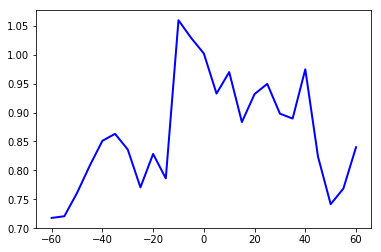

In [20]:
pl.figure()
pl.plot(mean_xs, mean_ys, color=colors[outcome], lw=2)


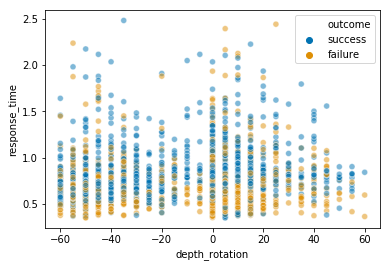

In [21]:
fig, ax = pl.subplots()
sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind', alpha=0.5)


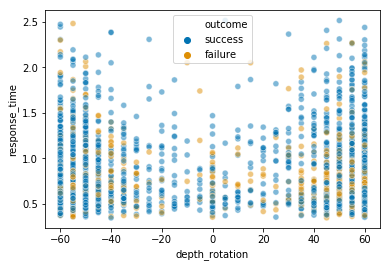

In [320]:
fig, ax = pl.subplots()
sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind', alpha=0.5)


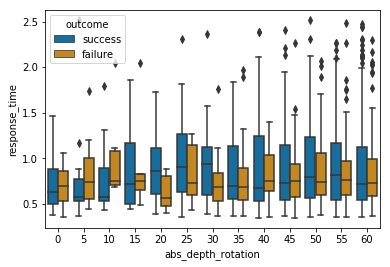

In [326]:
fig, ax = pl.subplots()
sns.boxplot(x='abs_depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind') #, alpha=0.7)


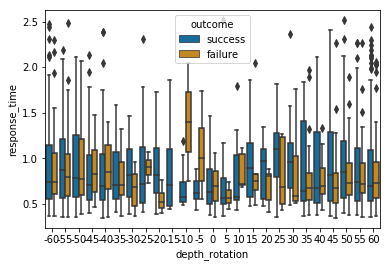

In [327]:
fig, ax = pl.subplots()
sns.boxplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind') #, alpha=0.7)


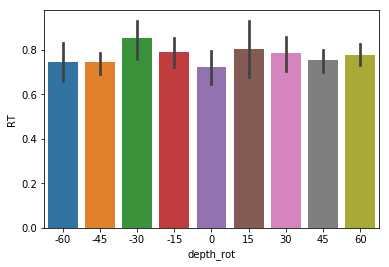

In [111]:
fig, ax = pl.subplots()
sns.barplot(x='depth_rot', y='RT', data=tmpd[tmpd['plane_rot']==0], ax=ax)
